In [1]:
from sklearn.cluster import KMeans
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("./picture2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

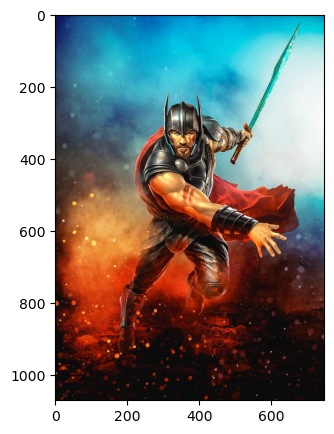

(1070, 747, 3)


In [3]:
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()
print (img.shape)

In [4]:
c_img = img.copy()
c_img = np.reshape(c_img, (-1,3))

print (c_img.shape)

(799290, 3)


In [5]:
kmeans = KMeans(n_clusters=7,random_state=2)

In [6]:
kmeans.fit_predict(c_img)

array([5, 5, 5, ..., 5, 5, 5])

In [7]:
centers = kmeans.cluster_centers_.astype(int)

print (centers)

[[202 228 226]
 [ 89  31  20]
 [ 37 175 204]
 [213 143  83]
 [187  62  24]
 [ 27  12  11]
 [ 69  95 112]]


In [8]:
per = np.array(np.unique(kmeans.labels_, return_counts=True)[1], dtype=np.float32)
per = per/c_img.shape[0]

print(per)

[0.12085601 0.16088654 0.17782282 0.08320134 0.09240826 0.24631861
 0.11850642]


In [9]:
dom = [ [per[ix], centers[ix]] for ix in range(kmeans.n_clusters) ]
#print (dom)
DOM = sorted(dom, reverse=True)

print (DOM)

[[0.2463186077643909, array([27, 12, 11])], [0.1778228177507538, array([ 37, 175, 204])], [0.16088653680141124, array([89, 31, 20])], [0.1208560097086164, array([202, 228, 226])], [0.11850642445170088, array([ 69,  95, 112])], [0.09240826233282037, array([187,  62,  24])], [0.0832013411903064, array([213, 143,  83])]]


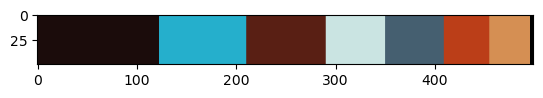

In [10]:
color_p = np.zeros((50,500,3)).astype(int)

start = 0
for ix in range(kmeans.n_clusters):
    width = int( (DOM[ix][0])*color_p.shape[1] )
    
    end = start+width
    color_p[:,start:end, :] = DOM[ix][1]
    start = end
    
plt.imshow(color_p)
plt.show()


In [11]:
for ix in range(c_img.shape[0]):
    c_img[ix] = centers[kmeans.labels_[ix]]
    
c_img = np.reshape(c_img, (img.shape[0], img.shape[1], 3))

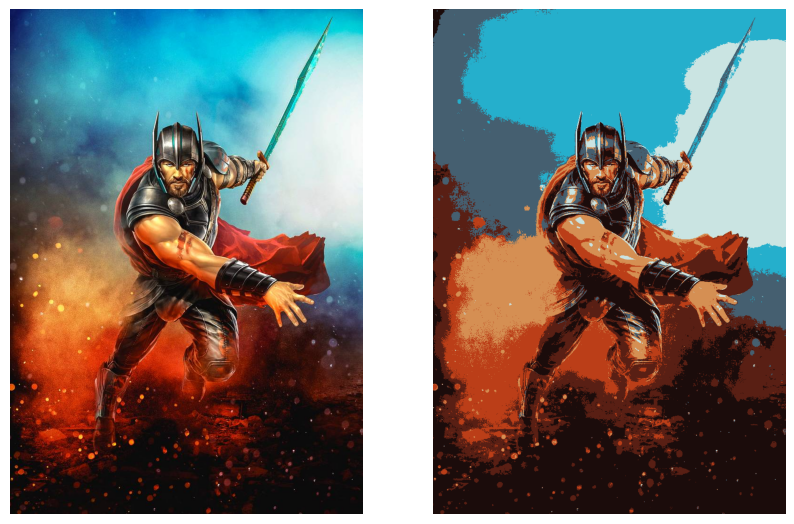

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(c_img)

plt.show()
#cv2.imwrite("new_picture2.png", c_img) 